In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
dms=lambda decs,mins,secs: (decs+(mins+secs/60)/60)*pi/180

In [3]:
alpha=dms(62,58,34)
salpha=dms(0,0,7)
lambd,deltaD,deltaM,deltaS=genfromtxt("angles.csv",delimiter=',',skip_header=1).T
len(lambd)

8

In [4]:
delta=dms(360,8,4)-dms(deltaD,deltaM,deltaS)
#delta=dms(360,1,0)-dms(deltaD,deltaM,deltaS)
sdelta=dms(0,0,30)
np=sin((alpha+delta)/2)/sin(alpha/2)
snp=np*sqrt(sdelta**2/tan((alpha+delta)/2)**2+salpha**2/tan(alpha/2)**2)/2

In [5]:
def olsim(x,y,sx,sy):
	a=0
	for i in range(3):
		w=1/(sy**2+(a*sx)**2)
		Sw=sum(w)
		ax=sum(x*w)/Sw
		ay=sum(y*w)/Sw
		axy=sum(x*y*w)/Sw
		ax2=sum((x**2+sx**2)*w)/Sw
		ay2=sum((y**2+sy**2)*w)/Sw
		a=(axy-ax*ay)/(ax2-ax*ax)
	b=(ax2*ay-ax*axy)/(ax2-ax*ax)
	n=len(x)
	chi2=sum((y-a*x-b)**2/(sy**2+(a*sx)**2))
	s02=n/(n-2)*(ay2-ay*ay-(axy-ax*ay)*(axy-ax*ay)/(ax2-ax*ax))
	sa2=s02/n/(ax2-ax*ax)
	sb2=sa2*ax2
	sa=sqrt(sa2)
	sb=sqrt(sb2)
	return a,b,sa,sb,chi2

[  3.71343846e-07  -5.29997420e-04   1.79589009e+00] [  3.83342049e-09   4.15658739e-06   1.10426999e-03]
485.63435125


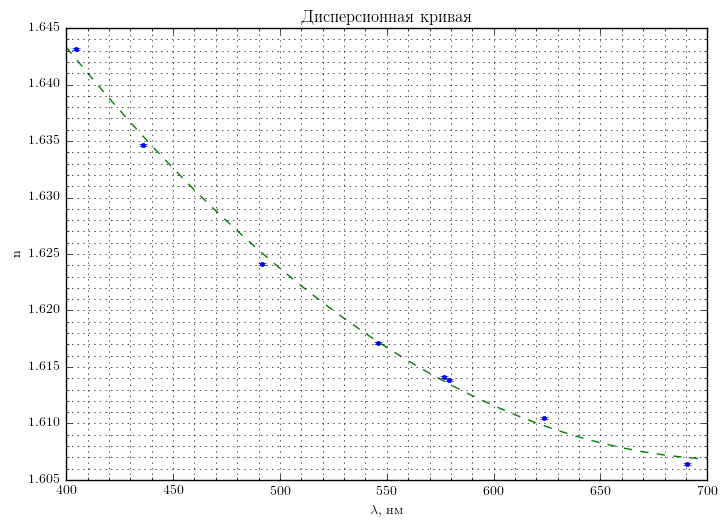

In [25]:
from scipy.optimize import curve_fit
errorbar(lambd,np,yerr=snp,fmt='.')
f=lambda x,a,b,c: a*x*x+b*x+c
f1=lambda x,v: f(x,v[0],v[1],v[2])
popt,pcov=curve_fit(f,lambd,np,sigma=snp,absolute_sigma=True)
perr=sqrt(diag(pcov))
print(popt,perr)
lambd1=arange(400,700.1,10)
plot(lambd1,f1(lambd1,popt),'--')
chi2=sum(((np-f1(lambd,popt))/snp)**2)
sna=sqrt(sum((np-f1(lambd,popt))**2)/len(np))
print(chi2)
#graph
rc('font',**{'family':'serif'})
rc('text', usetex=True)
rc('text.latex',unicode=True)
rc('text.latex',preamble=r'\usepackage[utf8]{inputenc}')
rc('text.latex',preamble=r'\usepackage[russian]{babel}')
rcParams['figure.figsize']=(8.27,5.83)
title("Дисперсионная кривая")
ylabel("n")
xlabel(r"$\lambda$, нм")
minorticks_on()
grid(which='both')
savefig("graph.pdf")

In [7]:
nD,nF,nC=f1(array([589.3,486.1,656.3]),popt)
lD=589.3
snD=sqrt((perr[0]*lD**2)**2+(perr[1]*lD)**2+(perr[2])**2+sna**2)
D=nF-nC
nu=(nD-1)/D
snu=nu*sqrt((sna/(nD-1))**2+2*(sna/D)**2)
print(nD,snD,D,sna*sqrt(2),nu,snu)

1.61252085934 0.00307279757577 0.0180027705884 0.000949221916295 34.0236996483 1.79433577622


In [8]:
nl=2*popt[0]*lambd[0]+popt[1]
snl=sna/50
a=7.1#cm
R=-1e7*a*nl
sR=-snl/nl*R
print(-nl,snl)
print(R,sR)

9.99069775043e-05 1.34240250773e-05
7093.3954028 953.105780486
